<a href="https://colab.research.google.com/github/vaishnavee1424/Image-classification/blob/main/DAY_8_RESNET_50_RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.preprocessing import image

In [ ]:
import keras.applications.resnet

In [ ]:
from keras.applications.resnet import preprocess_input

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [ ]:
img_width, img_height = 224, 224

In [ ]:
model_pretrained = ResNet50(weights='imagenet',
                      include_top=True,
                      input_shape=(img_height, img_width, 3))

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img_path = '/content/drive/MyDrive/resnet 50/peacock.jpeg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cnn_feature = model_pretrained.predict(img_data,verbose=0)

In [ ]:
label = decode_predictions(cnn_feature)
label = label[0][0]

35363/35363 [==============================] - 0s 0us/step


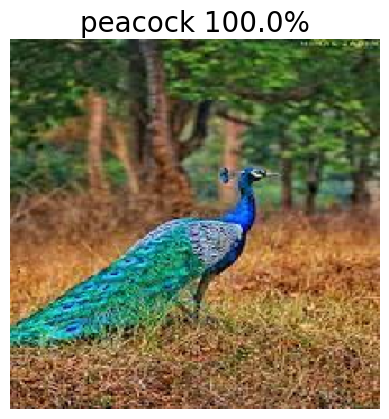

In [ ]:
plt.imshow(img)
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()


In [ ]:
img_path = '/content/drive/MyDrive/resnet 50/kutta.jpeg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

In [ ]:
cnn_feature = model_pretrained.predict(img_data,verbose=0)

In [ ]:
label = decode_predictions(cnn_feature)
label = label[0][0]

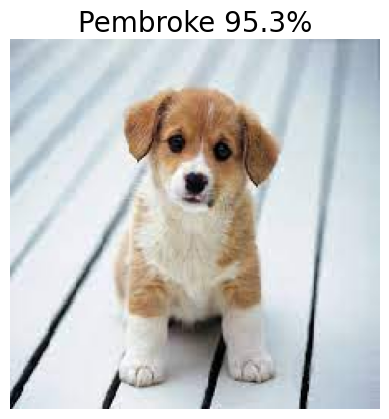

In [ ]:
plt.imshow(img)
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()


In [ ]:
img_path = '/content/drive/MyDrive/resnet 50/giraffe res.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

In [ ]:
cnn_feature = model_pretrained.predict(img_data,verbose=0)

In [ ]:
label = decode_predictions(cnn_feature)
label = label[0][0]

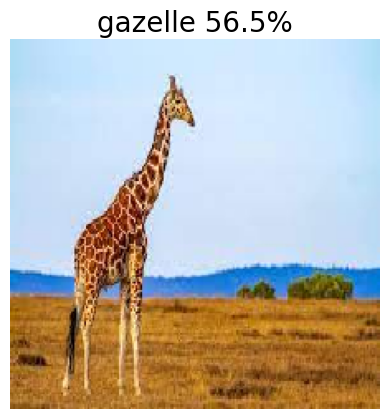

In [ ]:
plt.imshow(img)
stringprint ="%.1f" % round(label[2]*100,1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()


In [ ]:
#pip install streamlit

In [ ]:
#pip install TensorRT

In [ ]:
'''%%writefile app.py
import streamlit as st
import os

from PIL import Image
import numpy as np
import pickle
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

st.title('Recommendation System')

def save_uploaded_file(uploaded_file):
    try:
        with open(os.path.join('/content/drive/MyDrive/uploads',uploaded_file.name),'wb') as f:
            f.write(uploaded_file.getbuffer())
        return 1
    except Exception as e:
        print(e)
        return 0

def feature_extraction(img_path,model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

def recommend(features,feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)

    distances, indices = neighbors.kneighbors([features])

    return indices

# steps
# file upload -> save
uploaded_file = st.file_uploader("Choose an image")
if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):
        # display the file
        display_image = Image.open(uploaded_file)
        st.image(display_image)
        # feature extract
        features = feature_extraction(os.path.join("/content/drive/MyDrive/uploads",uploaded_file.name),model)
        #st.text(features)
        # recommendention
        indices = recommend(features,feature_list)
        # show
        col1,col2,col3,col4,col5 = st.columns(5)

        with col1:
            st.image(filenames[indices[0][0]])
        with col2:
            st.image(filenames[indices[0][1]])
        with col3:
            st.image(filenames[indices[0][2]])
        with col4:
            st.image(filenames[indices[0][3]])
        with col5:
            st.image(filenames[indices[0][4]])
    else:
        st.header("Some error occured in file upload")'''

'%%writefile app.py\nimport streamlit as st\nimport os\n\nfrom PIL import Image\nimport numpy as np\nimport pickle\nimport tensorflow\nfrom tensorflow.keras.preprocessing import image\nfrom tensorflow.keras.layers import GlobalMaxPooling2D\nfrom tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input\nfrom sklearn.neighbors import NearestNeighbors\nfrom numpy.linalg import norm\n\nfeature_list = np.array(pickle.load(open(\'embeddings.pkl\',\'rb\')))\nfilenames = pickle.load(open(\'filenames.pkl\',\'rb\'))\n\nmodel = ResNet50(weights=\'imagenet\',include_top=False,input_shape=(224,224,3))\nmodel.trainable = False\n\nmodel = tensorflow.keras.Sequential([\n    model,\n    GlobalMaxPooling2D()\n])\n\nst.title(\'Recommendation System\')\n\ndef save_uploaded_file(uploaded_file):\n    try:\n        with open(os.path.join(\'/content/drive/MyDrive/uploads\',uploaded_file.name),\'wb\') as f:\n            f.write(uploaded_file.getbuffer())\n        return 1\n    except Exception a

In [ ]:
#import streamlit as st

In [ ]:
#!streamlit run app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com